In [111]:
import pandas as pd
import numpy as np
from pathlib import Path
from unidecode import unidecode

In [118]:
data_dir = Path("../data/real_estate/ads.csv")
ds_original = pd.read_csv(data_dir)

In [119]:
ds_original.head()

,id,description,adress,date_pub,date_update,price,fee
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l..."
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l..."
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l..."


In [129]:
ds_original.columns

Index(['id', 'description', 'adress', 'date_pub', 'date_update', 'price',
       'fee'],
      dtype='object')

In [136]:
ds_original["description"].apply(unidecode)
ds_original["adress"].apply(unidecode)
ds_original["date_pub"].apply(unidecode)
ds_original["fee"].apply(unidecode)
ds_original["date_update"].apply(lambda s: unidecode(s) if type(s) == str else pd.NA)

0       Modifiee le 30 dec. 2021
1       Modifiee le 16 dec. 2021
2       Modifiee le 28 dec. 2021
3       Modifiee le 29 dec. 2021
4       Modifiee le 29 dec. 2021
                  ...           
1870    Modifiee le 29 dec. 2021
1871                        <NA>
1872                        <NA>
1873    Modifiee le 18 dec. 2021
1874    Modifiee le 18 dec. 2021
Name: date_update, Length: 1875, dtype: object

In [137]:
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:
  df = df.drop(["id", "price"], axis=1)
  
  for column in df.columns:
    df[column] = df[column].apply(lambda s: unidecode(s) if type(s) == str else pd.NA)
  
  return df

ds = clean_dataset(ds_original)

In [138]:
ds.head()

,description,adress,date_pub,date_update,fee
0,PARIS 17eme. AVENUE NIEL *** Video disponible ...,Achat appartement 2 pieces 63 m2Paris 17e 7501...,Publiee le 4 dec. 2021,Modifiee le 30 dec. 2021,Honoraires a la charge du vendeur
1,Appartement Paris 3 piece(s) 53 m2. Stephane P...,Achat appartement 3 pieces 53 m2Paris 18e 7501...,Publiee le 16 dec. 2021,Modifiee le 16 dec. 2021,"Honoraires : 5,00% TTC inclus a la charge de l..."
2,Vente Appartement 2 pieces de 31m2 - 75018 Par...,Achat appartement 2 pieces 31 m2Paris 18e 7501...,Publiee le 8 dec. 2021,Modifiee le 28 dec. 2021,Honoraires a la charge du vendeur
3,"A vendre, en exclusivite, dans le 11e arrondis...",Achat appartement 2 pieces 31 m2Paris 11e 7501...,Publiee le 15 dec. 2021,Modifiee le 29 dec. 2021,"Honoraires : 4,40% TTC inclus a la charge de l..."
4,"Gambetta 2 piece(s) 40 m2. Rue d'Annam, a quel...",Achat appartement 2 pieces 40 m2Paris 20e 7502...,Publiee le 24 nov. 2021,Modifiee le 29 dec. 2021,"Honoraires : 5,14% TTC inclus a la charge de l..."


In [141]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1875 non-null   object
 1   adress       1875 non-null   object
 2   date_pub     1875 non-null   object
 3   date_update  1562 non-null   object
 4   fee          1875 non-null   object
dtypes: object(5)
memory usage: 73.4+ KB


In [12]:
ds.describe()

,description,adress,date_pub,date_update,fee
count,1875,1875,1875,1562,1875
unique,596,576,55,31,284
top,"Paris 13 -Appartement 3 pièces de 64,40 m2. E...",Achat appartement 3 pièces 62 m²Paris 14e 7501...,Publiée il y a plus de 2 mois,Modifiée le 30 déc. 2021,Honoraires à la charge du vendeur
freq,9,12,527,238,879


In [16]:
description = ds["description"]
description.head()

0    PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...
1    Appartement Paris 3 pièce(s) 53 m2. Stéphane P...
2    Vente Appartement 2 pièces de 31m² - 75018 Par...
3    A vendre, en exclusivité, dans le 11e arrondis...
4    Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...
Name: description, dtype: object

In [28]:
description_lens = [len(sentence) for sentence in description]
description_lens.sort(reverse=True)
description_lens[:5]

[3204, 3204, 3204, 2726, 2726]

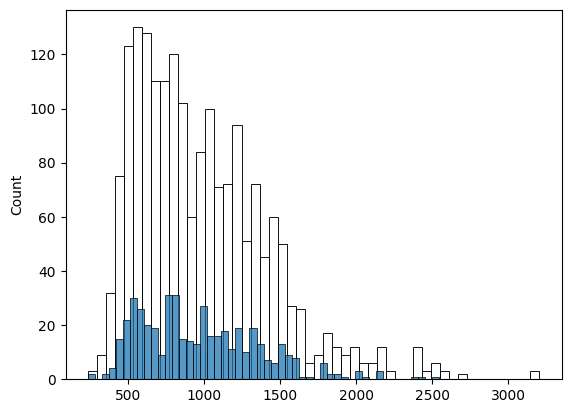

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

desc_percent = 0.25
desc_subset = random.choices(description_lens, k=int(len(description_lens) * desc_percent))
sns.histplot(description_lens, bins=50, color='#ffffff')
sns.histplot(desc_subset, bins=50, legend="description")
plt.show()

# а тепер нечітко

In [103]:
from rapidfuzz import fuzz
import fuzzy
from Levenshtein import distance as levenshtein_distance

In [146]:
class IntelektualnyiModul:
  def __init__(self, soundex: int = 4, threshold: float = 0.75):
    self.soundex = fuzzy.Soundex(soundex)
    self.weights = [
      (self.token_sort_ratio, 0.5),
      (self.soundex_similarity, 0.5),
      (self.damerau_levenshtein_distance, 0.0)
    ]
    
    self.threshold = threshold
    self.decisions = [
      "Yess🎀", "Nooo🚬",
    ]
  
  def soundex_similarity(self, str1, str2) -> int:
    return int(self.soundex(str1) == self.soundex(str2)) * 100
  
  def similarity_weighted(self, str1, str2, jw_: float = None, soundex_: int = None, levenshtein_: int = None) -> float:
    if jw_ is None:
      jw_ = self.token_sort_ratio(str1, str2)
    if soundex_ is None:
      soundex_ = self.soundex_similarity(str1, str2)
    if levenshtein_ is None:
      levenshtein_ = self.damerau_levenshtein_distance(str1, str2)
    
    similarity = (
      jw_ * 0.5 + 
      soundex_ * 0.5 + 
      levenshtein_ * 0.0
    )
    return round(similarity, 2)
  def similarity_weighted_V2(self, str1, str2, weights: list = None) -> float:
    if weights is None:
      weights = self.weights
    similarity = sum([w[0](str1, str2) * w[1] for w in weights])
    return round(similarity, 2) 
  
  def hard_decision(self, similarity, strong: bool = False) -> str:
    result_index = (similarity < self.threshold) if strong else (similarity <= self.threshold)
    return self.decisions[result_index]
  
  @staticmethod
  def damerau_levenshtein_distance(str1, str2) -> int:
    return levenshtein_distance(str1, str2)
  
  @staticmethod
  def token_sort_ratio(str1, str2) -> float:
    return fuzz.token_sort_ratio(str1, str2) / 100

  def compare(self, str1, str2) -> list:
    """
    Returns:
        list: 
          soundex_sim, 
          damerau-levenshtein, 
          token_sort_ratio, 
          similarity_weighted_V2
    """
    res_list = [
      self.soundex_similarity(str1, str2),
      self.damerau_levenshtein_distance(str1, str2),
      self.token_sort_ratio(str1, str2),
      self.similarity_weighted_V2(str1, str2),
    ]
    return [round(res, 2) for res in res_list]
  def compare_row(self, row: pd.Series) -> list:
    str1, str2 = row
    return self.compare(str1, str2)
  
modul = IntelektualnyiModul()

In [143]:
str1 = ds.iloc[0]['description']
str2 = ds.iloc[1]['description']

In [147]:
modul.similarity_weighted_V2(str1, str2)

0.25

In [148]:
modul.compare(str1, str2)

[0, 703, 0.5, 0.25]

In [150]:
ds.shape

(1875, 5)

In [159]:
ds_len = ds.shape[0]

column = 'description'
result_dict = {}
for i in range(ds_len):
  for j in range(i + 1, ds_len):
    str1, str2 = ds.iloc[i][column], ds.iloc[j][column]
    
    row_result = modul.compare(str1, str2)
    result_dict[(i, j)] = row_result
    #if j % 100 == 0:
    #  print(f'\t{j} rows were compared to row: {i}')
  if i % 10 == 0:
    print(f'row: {i} finished comparing')

row: 0 finished comparing
row: 10 finished comparing
row: 20 finished comparing
row: 30 finished comparing
row: 40 finished comparing
row: 50 finished comparing
row: 60 finished comparing
row: 70 finished comparing
row: 80 finished comparing
row: 90 finished comparing
row: 100 finished comparing


KeyboardInterrupt: 

In [208]:
def compare_column(ds: pd.Series) -> list:
  result_dict = {}
  ds_len = ds.shape[0]
  for i in range(ds_len):
    str1 = ds.iloc[i]
    max_str = -1
    for j in range(i + 1, ds_len):
      str2 = ds.iloc[j]
      max_str = max(max_str, len(str2))
      
      row_result = modul.compare(str1, str2)
      result_dict[(i, j)] = row_result
      #if j % 100 == 0:
      #  print(f'\t{j} rows were compared to row: {i}')
    if i % 15 == 0:
      print(f'row: {i}/{ds_len} finished comparing | str1_len: {len(str1)}')
  return result_dict

In [209]:
def compare_different_columns(s1: pd.Series, s2: pd.Series) -> list:
  result_dict = {}
  s1_len = s1.shape[0]
  s2_len = s2.shape[0]

  for i in range(s1_len):
    str1 = s1.iloc[i]
    max_str = -1
    for j in range(s2_len):
      str2 = s2.iloc[j]
      max_str = max(max_str, len(str2))
      
      row_result = modul.compare(str1, str2)
      result_dict[(i, j)] = row_result
      #if j % 100 == 0:
      #  print(f'\t{j} rows were compared to row: {i}')
    if i % 15 == 0:
      print(f'row: {i}/{ds_len} finished comparing | str1_len: {len(str1)}')
  return result_dict

In [200]:
column = "description"
compare_column(ds[column])

row: 0 finished comparing | str1_len: 973


KeyboardInterrupt: 

In [180]:
description_short = [s for s in ds['description'] if len(s) < 1750]
len(description_short)

1760

In [181]:
description_short_lens = [len(s) for s in description_short]

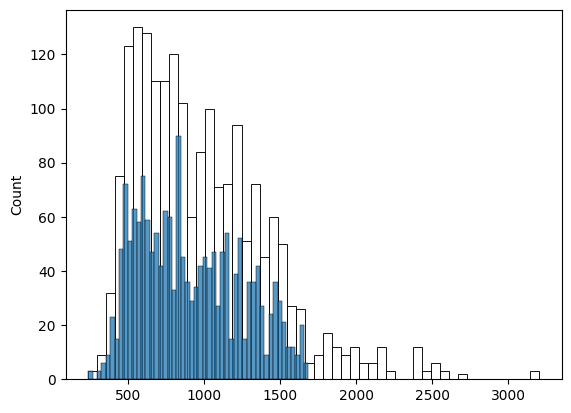

In [182]:
sns.histplot(description_lens, bins=50, color='#ffffff')
sns.histplot(description_short_lens, bins=50, legend="description")
plt.show()

In [185]:
desc_percent = 0.5
desc_subset = random.choices(description_short, k=int(len(description_short) * desc_percent))
len(desc_subset)

880

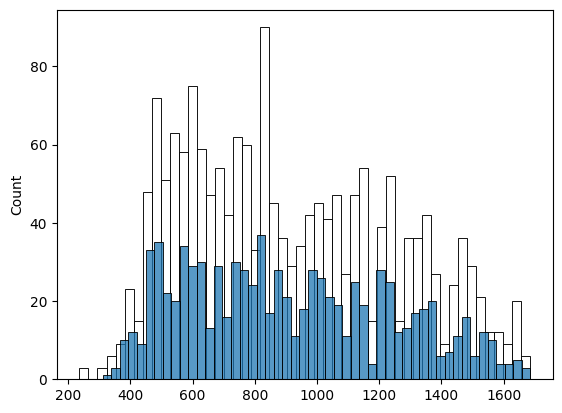

In [186]:
sns.histplot(description_short_lens, bins=50, color='#ffffff')
sns.histplot([len(s) for s in desc_subset], bins=50, legend="description")
plt.show()

In [191]:
description = pd.Series(desc_subset)

In [201]:
description_results = compare_column(description)

row: 0 finished comparing | str1_len: 1141
row: 15 finished comparing | str1_len: 967
row: 30 finished comparing | str1_len: 671
row: 45 finished comparing | str1_len: 856
row: 60 finished comparing | str1_len: 1105
row: 75 finished comparing | str1_len: 633
row: 90 finished comparing | str1_len: 795
row: 105 finished comparing | str1_len: 1190
row: 120 finished comparing | str1_len: 1271
row: 135 finished comparing | str1_len: 1248
row: 150 finished comparing | str1_len: 1193
row: 165 finished comparing | str1_len: 611
row: 180 finished comparing | str1_len: 517
row: 195 finished comparing | str1_len: 655
row: 210 finished comparing | str1_len: 1306
row: 225 finished comparing | str1_len: 1352
row: 240 finished comparing | str1_len: 603
row: 255 finished comparing | str1_len: 750
row: 270 finished comparing | str1_len: 922
row: 285 finished comparing | str1_len: 862
row: 300 finished comparing | str1_len: 1612
row: 315 finished comparing | str1_len: 615
row: 330 finished comparing | s

In [203]:
description_results

{(0, 1): [0, 864, 0.36, 0.18],
 (0, 2): [0, 804, 0.46, 0.23],
 (0, 3): [0, 1119, 0.51, 0.26],
 (0, 4): [0, 821, 0.49, 0.25],
 (0, 5): [0, 885, 0.48, 0.24],
 (0, 6): [0, 837, 0.4, 0.2],
 (0, 7): [0, 808, 0.56, 0.28],
 (0, 8): [0, 826, 0.48, 0.24],
 (0, 9): [0, 977, 0.53, 0.27],
 (0, 10): [0, 843, 0.49, 0.25],
 (0, 11): [0, 856, 0.44, 0.22],
 (0, 12): [0, 814, 0.5, 0.25],
 (0, 13): [0, 812, 0.5, 0.25],
 (0, 14): [0, 831, 0.43, 0.22],
 (0, 15): [0, 837, 0.5, 0.25],
 (0, 16): [0, 878, 0.52, 0.26],
 (0, 17): [0, 991, 0.55, 0.27],
 (0, 18): [0, 1060, 0.55, 0.27],
 (0, 19): [0, 906, 0.34, 0.17],
 (0, 20): [0, 866, 0.51, 0.26],
 (0, 21): [0, 1062, 0.48, 0.24],
 (0, 22): [0, 881, 0.56, 0.28],
 (0, 23): [0, 1226, 0.52, 0.26],
 (0, 24): [0, 814, 0.46, 0.23],
 (0, 25): [0, 817, 0.49, 0.25],
 (0, 26): [0, 834, 0.47, 0.24],
 (0, 27): [0, 846, 0.43, 0.21],
 (0, 28): [0, 852, 0.41, 0.2],
 (0, 29): [0, 829, 0.47, 0.23],
 (0, 30): [0, 821, 0.47, 0.24],
 (0, 31): [0, 866, 0.4, 0.2],
 (0, 32): [0, 1004, 0

In [207]:
description_results_df = pd.DataFrame(description_results)
description_results_df.T

0       1     2      3
0   1      0.0   864.0  0.36   0.18
    2      0.0   804.0  0.46   0.23
    3      0.0  1119.0  0.51   0.26
    4      0.0   821.0  0.49   0.25
    5      0.0   885.0  0.48   0.24
...        ...     ...   ...    ...
876 878    0.0  1165.0  0.39   0.20
    879    0.0   379.0  0.58   0.29
877 878    0.0  1061.0  0.56   0.28
    879    0.0   919.0  0.43   0.22
878 879  100.0  1190.0  0.35  50.18

[386760 rows x 4 columns]

In [210]:
save_path = "test_1.csv"
description_results_df.to_csv(save_path)